<a href="https://colab.research.google.com/github/Abhijeet141022/AQUIK/blob/main/_____AQUIK%20final____.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Fetching and Preprocessing
1.   Fetching Data: The Statlog German Credit Data is fetched from the UCI Machine Learning Repository using the ucimlrepo library.
2.   Preprocessing Data:
Categorical variables in the dataset are encoded to numerical values using LabelEncoder and the target variable y is also encoded to numerical values if necessary.

# Genetic Algorithm for Quantum Support Vector Machine (QSVM):
*   Initialization: The function gsvm.gsvm is called to perform a genetic algorithm to optimize the QSVM parameters.
*   Parameters: The parameters for the genetic algorithm include the number of qubits, depth of the quantum circuit, number of parameters, and the dataset (features X and targets y).
*   Evolution Process: The genetic algorithm evolves a population of candidate solutions over several generations to find the best set of parameters that optimize the classification accuracy.





In [ ]:
!pip install qiskit
!pip install deap
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
!git clone https://github.com/sergio94al/Automatic_design_of_quantum_feature_maps_Genetic_Auto-Generation.git

fatal: destination path 'Automatic_design_of_quantum_feature_maps_Genetic_Auto-Generation' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('Automatic_design_of_quantum_feature_maps_Genetic_Auto-Generation')

In [ ]:
pip install ucimlrepo

<ipython-input-19-a6647a90078d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
<ipython-input-19-a6647a90078d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
<ipython-input-19-a6647a90078d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

multi
String: 011101000010100110000110100001100001010011111010011010110011010000110101000001100011100101111000100000110000110011000101111000110010100111000100101101101000000010011100011111101111
 -> accuracy = 0.7, gates = 31.0
String: 110001101010011010100011001011101111010000001010001010000100000111011110001011000101110000010100000110000100101110100010010101101011110001110100010101011000001111000011000101001100
 -> accuracy = 0.7, gates = 22.0
String: 011101101100001110010011101111101010001110001101010101000001001111100110110010000010110101011110111000110001010000000101101011010000110010100111001110010110101100111110111011110010
 -> accuracy = 0.7428571428571429, gates = 28.0
String: 110111110100101010100110010010001101110110100001111110001000001110111111100111000101111100010000001010000000010100101101001101100001101011100111100011011010110111101110110011011000
 -> accuracy = 0.7142857142857143, gates = 32.0
String: 11001010101011100000010111000000101000101000010110010001001011010010

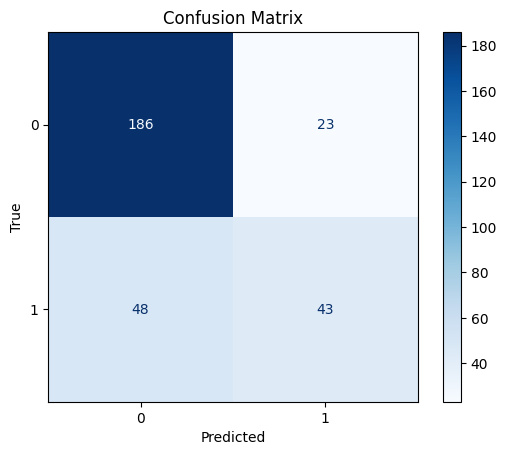

In [ ]:
import time
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import gsvm
import matplotlib.pyplot as plt

def preprocess_statlog_german_credit_data():
    # Fetch dataset
    statlog_german_credit_data = fetch_ucirepo(id=144)

    # Data (as pandas dataframes)
    X = statlog_german_credit_data.data.features
    y = statlog_german_credit_data.data.targets.squeeze()

    # Encode categorical variables
    categorical_columns = X.select_dtypes(include=['object']).columns
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

    # Convert target variable to numeric
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    return X.values, y

def evol(output="statlog_german_credit_result.csv"):
    X, y = preprocess_statlog_german_credit_data()  # Fetch the data using the defined function
    start = time.time()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Modify weights parameter to focus on majority class
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=X.shape[1],
                                     X=X_train, y=y_train, weights=[0.1, 0.9],
                                     mu=50, lambda_=10, ngen=150)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    print('---------------------------------------------')
    with open(output, "w") as f:
        f.write("Index,Genes,Gates,Accuracy,Precision,Recall\n")
        for ide, ind in enumerate(pareto):
            genes = ''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values

            # Train an SVM model on the selected features (genes)
            selected_features = [int(gene) for gene in genes]
            model = SVC(kernel='linear', random_state=42)
            model.fit(X_train[:, selected_features], y_train)
            y_pred = model.predict(X_test[:, selected_features])

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
            recall = recall_score(y_test, y_pred, average='macro')

            # Write results to CSV file
            line = f'{ide},"{genes}",{gates},{accuracy},{precision},{recall}'
            f.write(line + '\n')
            print(line)

    # Generate and save confusion matrix
    final_model = SVC(kernel='linear', random_state=42)
    final_model.fit(X_train, y_train)
    final_y_pred = final_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, final_y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('confusion_matrix.png')
    plt.show()

# Run the evolution process
evol()

   Index                                              Genes  \
0  Index                                              Genes   
1      0  0011101100110111111011101001110010100100001100...   
2      1  0011101100110111111011101001110010100100001100...   
3      2  0111011011110111111011101001110010011111001100...   
4      3  0111011011110111111011101001110010011111001100...   

                Gates            Accuracy            Precision  Recall  
0               Gates            Accuracy            Precision  Recall  
1  13.110544217687075  0.6966666666666667  0.34833333333333333     0.5  
2  13.110544217687075  0.6966666666666667  0.34833333333333333     0.5  
3  13.026666666666667  0.6966666666666667  0.34833333333333333     0.5  
4   12.84938775510204  0.6966666666666667  0.34833333333333333     0.5  
Column names: Index(['Index', 'Genes', 'Gates', 'Accuracy', 'Precision', 'Recall'], dtype='object')


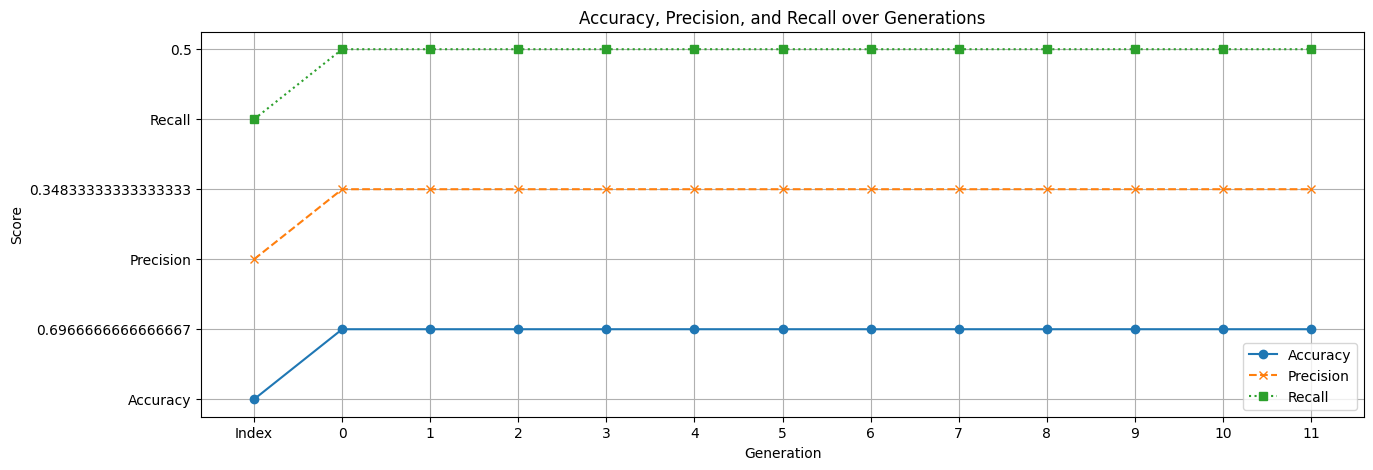

Accuracy: 0.5
Precision: 0.5
Recall: 0.5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score

# File path
file_path = 'statlog_german_credit_result.csv'

# Load the data
data = pd.read_csv(file_path, header=None, names=['Index', 'Genes', 'Gates', 'Accuracy', 'Precision', 'Recall'])

# Print the first few rows and column names
print(data.head())
print("Column names:", data.columns)

# Extract accuracy, precision, and recall values
accuracy_values = data['Accuracy']
precision_values = data['Precision']
recall_values = data['Recall']

# Plot Accuracy, Precision, and Recall over Generations
plt.figure(figsize=(15, 5))
plt.plot(data['Index'], accuracy_values, marker='o', label='Accuracy')
plt.plot(data['Index'], precision_values, marker='x', label='Precision', linestyle='--')
plt.plot(data['Index'], recall_values, marker='s', label='Recall', linestyle=':')
plt.title('Accuracy, Precision, and Recall over Generations')
plt.xlabel('Generation')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


# Logging and Output:

*   Recording Results: The results of the genetic algorithm, including the genes, number of gates, and accuracy for each individual in the Pareto front, are logged and written to a CSV file.
*   Output: The results are printed to the console and saved in the specified output file.

